In [198]:
import matplotlib
import pandas as pd
import censusdata
import openpyxl
import re
import os
import numpy as np

import matplotlib.pyplot as plt
##### CHECK FOR UNUSED IMPORTS

import sklearn.linear_model

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, train_test_split, validation_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_score, plot_roc_curve, make_scorer, classification_report, plot_confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error, recall_score, ConfusionMatrixDisplay


from yellowbrick.classifier import ROCAUC
from yellowbrick.regressor import PredictionError, ResidualsPlot


import seaborn as sns

import category_encoders as ce

from icecream import ic

import geopandas as gpd

In [199]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [200]:
censusdata.search('acs1', 2012, 'concept', 'race')

[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

In [201]:
censusdata.search('acs1', 2012, 'label', 'age')[0]

('B01002A_001E',
 'MEDIAN AGE BY SEX (WHITE ALONE)',
 'Estimate!!Median age!!Total')

In [202]:
censusdata.printtable(censusdata.censustable('acs1', 2012, 'B01001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

In [203]:
censusdata.printtable(censusdata.censustable('acs1', 2012, 'B01002A'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01002A_001E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Total                          | float
B01002A_002E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Male                           | float
B01002A_003E | MEDIAN AGE BY SEX (WHITE ALONE | !! !! Estimate Median age Female                         | float
-------------------------------------------------------------------------------------------------------------------


In [204]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs1', 2012)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [205]:
censusdata.geographies(censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), 'acs5', 2012)


{'State Senate District 40 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '040'))),
 'State Senate District 8 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '008'))),
 'State Senate District 39 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '039'))),
 'State Senate District 9 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '009'))),
 'State Senate District 10 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '010'))),
 'State Senate District 57 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '057'))),
 'State Senate District 58 (2012), New York': censusgeo((('state', '36'), ('state legislative district (upper chamber)', '058'))),
 'State Senate District 59 (2012), New York': censusgeo((('state', '36'), ('state leg

In [206]:
data = censusdata.download('acs5', 2012, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), ['B01001_001E', 'B01001_002E', 'B01001_026E'])

In [207]:
data

,B01001_001E,B01001_002E,B01001_026E
"State Senate District 40 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):040",304418,150390,154028
"State Senate District 8 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):008",312213,150938,161275
"State Senate District 39 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):039",293597,145730,147867
"State Senate District 9 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):009",312806,151273,161533
"State Senate District 10 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):010",323789,151850,171939
...,...,...,...
"State Senate District 34 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):034",321252,157436,163816
"State Senate District 35 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):035",301542,145250,156292
"State Senate District 36 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):036",325191,146459,178732
"State Senate District 37 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):037",314509,151213,163296


In [208]:
values_to_grab = {'B01001001': "Total Pop",
                  'B01001002': "Male",
                  'B01001026': "Female",
                  'B02001002':"White alone",
                  'B02001003':"Black or African American alone",
                  'B02001004':"American Indian and Alaska Native alone",
                  'B02001005':"Asian alone",
                  'B02001006':"Native Hawaiian and Other Pacific Islander alone",
                  'B02001007':"Some other race alone",
                  'B02001008':"Two or more races:",
                  'B02001009':"Two races including Some other race",
                  'B02001010':"Two races excluding Some other race, and three or more races",
                  'B05001002':"U.S. citizen, born in the United States",
                  'B05001003':"U.S. citizen, born in Puerto Rico or U.S. Island Areas",
                  # Universe is limited to families with children
                  # 'B05010002':"Under poverty level",
                  # 'B05010010':"Between 1x and 1.99x poverty level",
                  # 'B05010018':"At least 2x poverty level",
                  "B06007002"	:"Speak only English",
                  "B06007003"	:"Speak Spanish",
                  "B06007006"	:"Speak other languages",
                  "B06008002"	:"Never married",
                  "B06008003"	:"Now married, except separated",
                  "B06008004"	:"Divorced",
                  "B06008005"	:"Separated",
                  "B06008006"	:"Widowed",
                  "B06009002"	:"Less than high school graduate",
                  "B06009003"	:"High school graduate (includes equivalency)",
                  "B06009004"	:"Some college or associate's degree",
                  "B06009005"	:"Bachelor's degree",
                  "B06009006"	:"Graduate or professional degree",
                  "B06010002"	:"No income",
                  "B06010004"	:"$1 to $9,999 or loss",
                  "B06010005"	:"$10,000 to $14,999",
                  "B06010006"	:"$15,000 to $24,999",
                  "B06010007"	:"$25,000 to $34,999",
                  "B06010008"	:"$35,000 to $49,999",
                  "B06010009"	:"$50,000 to $64,999",
                  "B06010010"	:"$65,000 to $74,999",
                  "B06010011"	:"$75,000 or more",
                  "B16004002"	:"5 to 17 years",
                  "B16004024"	:"18 to 64 years",
                  "B16004046"	:"65 years and over"








}

In [209]:
ny_senate_demo_data_2012 = censusdata.download('acs5', 2012, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])

In [210]:
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))

ny_senate_demo_data_2012

,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
"State Senate District 40 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):040",304418,150390,154028,253024,15252,622,10588,27,17849,7056,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
"State Senate District 8 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):008",312213,150938,161275,227510,50463,934,9875,9,16133,7289,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
"State Senate District 39 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):039",293597,145730,147867,229963,29964,689,7720,20,18671,6570,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
"State Senate District 9 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):009",312806,151273,161533,232591,37889,644,18038,9,17437,6198,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
"State Senate District 10 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):010",323789,151850,171939,48425,169970,1496,40305,141,50220,13232,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"State Senate District 34 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):034",321252,157436,163816,161872,48047,1058,22331,0,77737,10207,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
"State Senate District 35 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):035",301542,145250,156292,175189,57545,918,21284,66,36125,10415,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
"State Senate District 36 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):036",325191,146459,178732,47342,198884,1297,10095,48,57713,9812,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
"State Senate District 37 (2012), New York: Summary level: 610, state:36> state legislative district (upper chamber):037",314509,151213,163296,239728,20967,402,17666,35,28430,7281,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


In [211]:
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.reset_index(drop=False)

ny_senate_demo_data_2012

,index,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,"State Senate District 40 (2012), New York: Sum...",304418,150390,154028,253024,15252,622,10588,27,17849,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
1,"State Senate District 8 (2012), New York: Summ...",312213,150938,161275,227510,50463,934,9875,9,16133,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
2,"State Senate District 39 (2012), New York: Sum...",293597,145730,147867,229963,29964,689,7720,20,18671,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
3,"State Senate District 9 (2012), New York: Summ...",312806,151273,161533,232591,37889,644,18038,9,17437,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
4,"State Senate District 10 (2012), New York: Sum...",323789,151850,171939,48425,169970,1496,40305,141,50220,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"State Senate District 34 (2012), New York: Sum...",321252,157436,163816,161872,48047,1058,22331,0,77737,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
59,"State Senate District 35 (2012), New York: Sum...",301542,145250,156292,175189,57545,918,21284,66,36125,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
60,"State Senate District 36 (2012), New York: Sum...",325191,146459,178732,47342,198884,1297,10095,48,57713,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
61,"State Senate District 37 (2012), New York: Sum...",314509,151213,163296,239728,20967,402,17666,35,28430,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


In [212]:
# u for upper, l for lower
ny_senate_demo_data_2012['index'] = ny_senate_demo_data_2012['index'].apply(lambda x: 'u'+x.geo[1][1])
ny_senate_demo_data_2012 = ny_senate_demo_data_2012.rename(columns={'index': 'district'})
ny_senate_demo_data_2012

,district,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,u040,304418,150390,154028,253024,15252,622,10588,27,17849,...,14996,25047,21186,23325,20229,10449,62704,57746,188432,42036
1,u008,312213,150938,161275,227510,50463,934,9875,9,16133,...,17663,27642,24005,29723,23567,11550,48856,55467,195262,43341
2,u039,293597,145730,147867,229963,29964,689,7720,20,18671,...,18094,27908,22690,24429,21008,10466,35704,59077,180984,31151
3,u009,312806,151273,161533,232591,37889,644,18038,9,17437,...,16376,26816,21828,27145,25529,11300,57567,55381,194032,47158
4,u010,323789,151850,171939,48425,169970,1496,40305,141,50220,...,20006,33351,28865,31572,20248,7768,18488,61054,209064,32153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,u034,321252,157436,163816,161872,48047,1058,22331,0,77737,...,19058,29218,24044,31574,23043,9317,33237,48533,204034,49978
59,u035,301542,145250,156292,175189,57545,918,21284,66,36125,...,17887,27945,22304,24275,18990,8756,48501,53054,186220,42745
60,u036,325191,146459,178732,47342,198884,1297,10095,48,57713,...,20781,34816,29242,34730,21409,8217,16314,58280,204993,39735
61,u037,314509,151213,163296,239728,20967,402,17666,35,28430,...,15862,25487,21038,24365,22245,10722,61741,55424,190926,49611


Get all the required census data

In [213]:
census_data = pd.DataFrame()
# acs data doesn't exist for census years ie 2020
for year in [2012, 2014, 2016, 2018]:
    demo_data_senate = censusdata.download('acs5', year, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(upper%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])
    demo_data_assembly = censusdata.download('acs5', year, censusdata.censusgeo([('state', '36'), ('state%20legislative%20district%20(lower%20chamber)', '*')]), [each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()])
    
    demo_data_senate = demo_data_senate.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))
    demo_data_assembly = demo_data_assembly.rename(columns=dict(zip([each[:6] + '_' + each[6:] + 'E' for each in values_to_grab.keys()], values_to_grab.values())))
    
    demo_data_assembly = demo_data_assembly.reset_index(drop=False)
    demo_data_senate = demo_data_senate.reset_index(drop=False)
    
    demo_data_assembly['index'] = demo_data_assembly['index'].apply(lambda x: 'l'+x.geo[1][1])
    demo_data_assembly = demo_data_assembly.rename(columns={'index': 'district'})

    demo_data_senate['index'] = demo_data_senate['index'].apply(lambda x: 'u'+x.geo[1][1])
    demo_data_senate = demo_data_senate.rename(columns={'index': 'district'})
    
    demo_data_assembly['year'] = year
    demo_data_senate['year'] = year
    
    census_data = pd.concat([census_data, demo_data_assembly, demo_data_senate])

census_data

,district,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,...,"$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,year
0,l134,131534,63157,68377,118629,6482,300,2123,7,1886,...,15803,13897,16734,11775,4450,9640,21471,82456,20597,2012
1,l135,132025,63465,68560,123730,2534,94,3357,57,697,...,12630,11231,14188,11665,5490,17921,24352,78759,21820,2012
2,l064,124067,59521,64546,102746,3392,382,10947,76,4393,...,11927,9639,11586,9302,4343,17324,18874,79886,18525,2012
3,l065,128968,62745,66223,51937,6551,397,56030,62,10254,...,11237,8378,8673,8533,3967,21199,12008,92441,19082,2012
4,l058,129703,58039,71664,4714,118255,218,2188,8,2923,...,14523,12028,15282,9211,3499,7277,20507,84568,16437,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,u042,293926,148790,145136,229571,26549,1184,6375,79,17948,...,31773,24389,27791,21996,9559,36391,46191,184626,48645,2018
59,u043,296988,146472,150516,275265,7422,457,5732,25,2168,...,30855,27671,34086,28859,13318,43531,43670,183885,54912,2018
60,u044,293263,140757,152506,210092,44241,532,19138,133,5027,...,32384,25631,31014,25063,10704,34640,38835,194861,43880,2018
61,u045,298350,154072,144278,272849,10505,4315,2591,160,3585,...,35849,30558,33075,24747,10277,23274,41439,188516,54514,2018


# 2020 census data is stored completely differently - come back to later

https://www.census.gov/programs-surveys/acs/data/experimental-data/1-year.html

In [214]:
# dataset is too large to be loaded to github but can be found at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/3WZFK9

# harvard_data = pd.read_csv('196slers1967to2016_20180908.tab', delimiter='\t')

# ny_election_data = harvard_data[(harvard_data['sab'] == 'ny') & (harvard_data['year'] >= 2011)][['year', 'sab', 'ddez', 'sen', 'dname', 'dno', 'dtype', 'etype', 'cando', 'cand', 'party', 'prior1', 'prior2', 'exper', 'vote', 'outcome']]

In [215]:
harvard_data = pd.read_csv('harvard_data_2010+.csv', index_col=0)
harvard_data

/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,13,14,18,23,28,32,48,56,67,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,caseid,uncert,year,month,day,sid,sab,sfips,sicpsr,cname,...,ltype2b,namebsource,v38,v39,v56,v57,v58,v18_20171211,v19_20171211,v19_20160217
3257,294964,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294964.0,"BURDINE, GREG","BURDINE, GREG"
3258,294965,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2221.0,"HANSON, QUINTON","HANSON, QUINTON"
3259,294966,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,294966.0,WRITEIN,WRITEIN
3260,294967,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270539.0,"CURTIS, MIKE","CURTIS, MIKE"
3261,294968,NaN,2010,11.0,2.0,1,al,1,41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3249.0,"GREER, LYNN","GREER, LYNN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378340,378228,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321320.0,"ANDERSON, JAMES LEE",NaN
378341,378230,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378230.0,SCATTERING,NaN
378342,378223,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378223.0,"FORD, ROBERT",NaN
378343,378225,NaN,2016,11.0,8.0,50,wy,56,68,natrona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256633.0,"SCOTT, CHARLES K.",NaN


In [216]:
ny_election_data = harvard_data[(harvard_data['sab'] == 'ny') & (harvard_data['year'] >= 2011)][['year', 'sab', 'ddez', 'sen', 'dname', 'dno', 'dtype', 'etype', 'cando', 'cand', 'party', 'prior1', 'prior2', 'exper', 'vote', 'outcome']]

In [217]:
ny_election_data['prior1'].value_counts()

Series([], Name: prior1, dtype: int64)

In [218]:
ny_election_data['prior2'].value_counts()

Series([], Name: prior2, dtype: int64)

In [219]:
ny_election_data['cand'].value_counts()

scattering                362
seward, james l.           69
lopez, peter d.            55
amedore, george a. jr.     51
little, elizabeth o.       42
                         ... 
meyer, mindy                1
langdon, andrew p.          1
koon, david r.              1
burke, richard e.           1
sweeney, michael j.         1
Name: cand, Length: 770, dtype: int64

In [220]:
ny_election_data['etype'].value_counts()

g                4248
dp                245
rp                181
conservativep     151
indepp            144
workp             136
greenp              5
Name: etype, dtype: int64

In [221]:
ny_election_data['dtype'].value_counts()

1.0    5110
Name: dtype, dtype: int64

In [222]:
ny_election_data['dname'].value_counts()

Series([], Name: dname, dtype: int64)

# Likely remove in favor of previous winner party

Prior columns are useless for this segment of data though incumbency (expr column) is going to be a huge indicator obviously. For this research I'm going to limit to general elections. Then I'm going to need to combine candidates due to NY's fusion voting system.

In [223]:
ny_election_data = ny_election_data[ny_election_data['etype'] == 'g'][['year', 'sab', 'ddez', 'sen', 'cand', 'party', 'exper', 'vote', 'outcome']]
ny_election_data

,year,sab,ddez,sen,cand,party,exper,vote,outcome
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,29644.0,w
238121,2012,ny,1,0,"thiele, fred w. jr.",workingfamilies,inc,4142.0,w
238122,2012,ny,1,0,"thiele, fred w. jr.",independent,inc,4219.0,w
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l
238124,2012,ny,2,0,"losquadro, daniel p.",independent,inc,1941.0,w
...,...,...,...,...,...,...,...,...,...
248553,2016,ny,63,1,"kennedy, timothy m.",democrat,inc,78674.0,w
248554,2016,ny,63,1,"kennedy, timothy m.",wep,inc,1191.0,w
248555,2016,ny,63,1,"kennedy, timothy m.",indep,inc,3751.0,w
248556,2016,ny,63,1,"kennedy, timothy m.",working,inc,6034.0,w


In [224]:
list_of_candidates = ny_election_data['cand'].unique()

list_of_candidates

array(['thiele, fred w. jr.', 'deegan, nicholas f.',
       'losquadro, daniel p.', 'hennessey, edward j.', 'murray, dean',
       'englebright, steven', 'mckee, deborah j.', 'salamone, victor e.',
       'graf, alfred c.', 'ramos, philip r.', 'troche, manuel',
       'bodkin, christopher d.', 'garbarino, andrew r.',
       'safer, jesse a.', 'fitzpatrick, michael j.', 'cherlin, jay s.',
       'saladino, joseph s.', 'dujmic, joseph s. jr.',
       'lupinacci, chad a.', 'sweeney, robert k.', 'cureton, rashad',
       'raia, andrew p.', 'lavine, charles d.', 'imbroto, louis',
       'peress, jeffery j.', 'brooks, john e.', 'mcdonough, david g.',
       'ferone, mario', 'montesano, michael a.', 'schimel, michelle e.',
       'stiek, richard e.', 'brady, kevin c.', 'mckevitt, thomas',
       'hooper, earlene hill', 'mccabe, elton e.', 'port, gary b.',
       'ra, edward p.', 'weisenberg, harvey', 'sussman, david j.',
       'friedman, jeffrey s.', 'curran, brian f.',
       'solages, mich

In [225]:
ny_election_data['year'].value_counts()

2016    2083
2014    1355
2012     810
Name: year, dtype: int64

no off year elections

In [226]:
combined_ballot_lines = []

for candidate in list_of_candidates:
    ballot_lines = ny_election_data[ny_election_data['cand'] == candidate]
    for year in ballot_lines['year'].unique():
        single_year = ballot_lines[ballot_lines['year'] == year].sort_values(by=['vote'], ascending=False)
        
        vote_total = single_year['vote'].sum()
        year_line = single_year.iloc[0]
#         print(year_line)
        year_line.at['vote'] = vote_total
        combined_ballot_lines.append(year_line)

df_combined_ballot_lines = pd.DataFrame(combined_ballot_lines)

df_combined_ballot_lines

/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/pandas/core/series.py:1169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_values(loc, value)


,year,sab,ddez,sen,cand,party,exper,vote,outcome
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,38005.0,w
239258,2014,ny,1,0,"thiele, fred w. jr.",democrat,inc,19956.0,w
240067,2016,ny,1,0,"thiele, fred w. jr.",democrat,inc,35246.0,w
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l
238126,2012,ny,2,0,"losquadro, daniel p.",modernrepublican,inc,34305.0,w
...,...,...,...,...,...,...,...,...,...
248502,2016,ny,60,1,"small, adam e.",democrat,none,51036.0,l
248503,2016,ny,60,1,"depasquale, james v.",green,none,2835.0,l
248509,2016,ny,60,1,"jacobs, christopher l.",republican,none,77327.0,w
248513,2016,ny,61,1,"loughran, thomas a.",democrat,none,53363.0,l


In [227]:
ny_election_data[ny_election_data['cand'] == 'thiele, fred w. jr.'].groupby(['year']).sum()

,sen,vote
year,,
2012,0,38005.0
2014,0,19956.0
2016,0,35246.0


In [228]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2012) & (df_combined_ballot_lines['ddez'] == 3) & (df_combined_ballot_lines['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome
246636,2012,ny,3,1,"genco, francis t.",democrat,none,41139.0,l
246639,2012,ny,3,1,"zeldin, lee m.",modernrepublican,inc,51920.0,w


In [229]:
ny_election_data[(ny_election_data['year'] == 2014) & (ny_election_data['ddez'] == 3) & (ny_election_data['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome
247169,2014,ny,3,1,"esposito, adrienne",democrat,none,21213.0,l
247170,2014,ny,3,1,"croci, thomas d.",independent,none,1776.0,w
247171,2014,ny,3,1,"croci, thomas d.",conservative,none,5681.0,w
247172,2014,ny,3,1,"esposito, adrienne",green,none,952.0,l
247173,2014,ny,3,1,"esposito, adrienne",workingfamilies,none,2035.0,l
247174,2014,ny,3,1,"croci, thomas d.",modernrepublican,none,26404.0,w


In [230]:
df_combined_ballot_lines['district'] = df_combined_ballot_lines.apply(lambda row: ('u' if row['sen'] == 1 else 'l') + '{:0>3}'.format(row['ddez']), axis=1)
df_combined_ballot_lines

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
238120,2012,ny,1,0,"thiele, fred w. jr.",democrat,inc,38005.0,w,l001
239258,2014,ny,1,0,"thiele, fred w. jr.",democrat,inc,19956.0,w,l001
240067,2016,ny,1,0,"thiele, fred w. jr.",democrat,inc,35246.0,w,l001
238123,2012,ny,2,0,"deegan, nicholas f.",democrat,none,18159.0,l,l002
238126,2012,ny,2,0,"losquadro, daniel p.",modernrepublican,inc,34305.0,w,l002
...,...,...,...,...,...,...,...,...,...,...
248502,2016,ny,60,1,"small, adam e.",democrat,none,51036.0,l,u060
248503,2016,ny,60,1,"depasquale, james v.",green,none,2835.0,l,u060
248509,2016,ny,60,1,"jacobs, christopher l.",republican,none,77327.0,w,u060
248513,2016,ny,61,1,"loughran, thomas a.",democrat,none,53363.0,l,u061


In [231]:
df_combined_ballot_lines[df_combined_ballot_lines['sen'] == 1]['ddez'].unique()

array([ 8, 18, 26, 31, 28, 33, 49, 63,  9, 20, 21, 25, 19, 29, 56, 55,  1,
       27,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 22, 23,
       24, 30, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 50, 51, 52, 53, 54, 57, 58, 59, 60, 61, 62])

In [232]:
df_combined_ballot_lines[(df_combined_ballot_lines['sen'] == 1) & (df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['ddez'] == 63)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
248553,2016,ny,63,1,"kennedy, timothy m.",democrat,inc,89650.0,w,u063


In [233]:
df_combined_ballot_lines[(df_combined_ballot_lines['sen'] == 0) & (df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['ddez'] == 63)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
240384,2016,ny,63,0,"cusick, michael j.",democrat,inc,34559.0,w,l063


In [234]:
df_combined_ballot_lines['ddez'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

In [235]:
((df_combined_ballot_lines['ddez'] == 150) & (df_combined_ballot_lines['sen'] == 1)).any()

False

In [236]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2014) & (df_combined_ballot_lines['ddez'] == 3) & (df_combined_ballot_lines['sen'] == 1)]

,year,sab,ddez,sen,cand,party,exper,vote,outcome,district
247169,2014,ny,3,1,"esposito, adrienne",democrat,none,24200.0,l,u003
247174,2014,ny,3,1,"croci, thomas d.",modernrepublican,none,33861.0,w,u003


Need to combine rows so each row represents one general election. Vote feature should be net democratic votes


In [237]:
df_combined_ballot_lines = df_combined_ballot_lines[['year', 'cand', 'party', 'exper', 'vote', 'district']]

In [238]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2012) & (df_combined_ballot_lines['district'] == 'l002')& (df_combined_ballot_lines['party'].isin(['democrat', 'modernrepublican']))]

,year,cand,party,exper,vote,district
238123,2012,"deegan, nicholas f.",democrat,none,18159.0,l002
238126,2012,"losquadro, daniel p.",modernrepublican,inc,34305.0,l002


In [239]:
def process_ny_boe_data(document_name):
    output = pd.DataFrame()

    for district in pd.read_excel('ny_data/' + document_name, sheet_name=None).keys():
        sheet = pd.read_excel('ny_data/' + document_name, sheet_name=district, header=1)
        if 'Candidate Name (Party)' in sheet.columns:
#             print(sheet['Candidate Name (Party)'])
            sheet = sheet.dropna()
            sheet['party'] = sheet['Candidate Name (Party)'].apply(lambda x: 'democratic' if x[-4:-1] == 'DEM' else ('modernrepublican' if x[-4:-1] == 'REP' else None))
            sheet = sheet[['Candidate Name (Party)', 'Total Votes by Candidate', 'party']]
            dnumber, dtype = district.split()
            dnumber = re.findall(r'\d+', dnumber)[0]
            if dtype == 'AD':
                district = 'l' + '{:0>3}'.format(dnumber)
            elif dtype == 'SD':
                district = 'u' + '{:0>3}'.format(dnumber)
            sheet['district'] = pd.Series([district, district])
            year = int(document_name[:4])
            sheet['year'] = pd.Series([year, year])
            output = pd.concat([output, sheet])
        else:
            pass
        
        
    output = output.rename(columns={'Candidate Name (Party)': 'cand', 'Total Votes by Candidate': "vote"})
    return (output)

In [240]:
# # convert multisheet xlsx to easy to ammend csv

# for file in os.listdir('ny_data/'):
#     print(file)
#     if os.path.isfile('ny_data/' + file):
#         process_ny_boe_data(file).to_csv('ny_data/processed/' + file[:-5] + 'processed.csv')


At this point I went in by hand and marked whether a candidate was an incumbent or not. Now we need to import that data back in, combine it with the 2012-2016 data, and then alter the info so that each election takes up one row.

In [241]:
ny_boe_data = pd.DataFrame()

for file in os.listdir('ny_data/processed/'):
#     print(file[-3:])
    if file[-4:] == '.csv':
        x = pd.read_csv('ny_data/processed/' + file, index_col=0)
        ny_boe_data = pd.concat([ny_boe_data, x])
        
# fill in NaNs in exper column with "none" to match harvard data
ny_boe_data['exper'] = ny_boe_data['exper'].fillna('none')
        

ny_boe_data

,cand,vote,party,district,year,exper
0,Laura A. Ahearn (DEM),82900,democratic,u001,2020.0,none
1,Anthony H. Palumbo (REP),87563,modernrepublican,u001,2020.0,none
0,Michael G. Siderakis (DEM),70833,democratic,u002,2020.0,none
1,Mario R. Mattera (REP),93224,modernrepublican,u002,2020.0,none
0,Monica R. Martinez (DEM),63286,democratic,u003,2020.0,inc
...,...,...,...,...,...,...
1,Joseph M. Giglio (REP),39964,modernrepublican,l148,2020.0,inc
0,Jonathan D. Rivera (DEM),38611,democratic,l149,2020.0,none
1,Joseph Totaro (REP),19922,modernrepublican,l149,2020.0,none
0,Christina Cardinale (DEM),17845,democratic,l150,2020.0,none


In [242]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2016) & (df_combined_ballot_lines['district'] == 'l003')]

,year,cand,party,exper,vote,district
240083,2016,"murray, dean",republican,inc,29087.0,l003
240079,2016,"schoen, gregory d.",democrat,none,17404.0,l003


In [243]:
df_combined_ballot_lines = pd.concat([df_combined_ballot_lines, ny_boe_data])

df_combined_ballot_lines

,year,cand,party,exper,vote,district
238120,2012.0,"thiele, fred w. jr.",democrat,inc,38005.0,l001
239258,2014.0,"thiele, fred w. jr.",democrat,inc,19956.0,l001
240067,2016.0,"thiele, fred w. jr.",democrat,inc,35246.0,l001
238123,2012.0,"deegan, nicholas f.",democrat,none,18159.0,l002
238126,2012.0,"losquadro, daniel p.",modernrepublican,inc,34305.0,l002
...,...,...,...,...,...,...
1,2020.0,Joseph M. Giglio (REP),modernrepublican,inc,39964.0,l148
0,2020.0,Jonathan D. Rivera (DEM),democratic,none,38611.0,l149
1,2020.0,Joseph Totaro (REP),modernrepublican,none,19922.0,l149
0,2020.0,Christina Cardinale (DEM),democratic,none,17845.0,l150


combine republican and modernrepublican, democrat and democratic

In [244]:
df_combined_ballot_lines = df_combined_ballot_lines.replace('republican', 'modernrepublican')
df_combined_ballot_lines = df_combined_ballot_lines.replace('democrat', 'democratic')

# drop third party only candidates
df_combined_ballot_lines = df_combined_ballot_lines.dropna()

In [246]:
df_combined_ballot_lines.to_csv('ny_thru_2018.csv')

In [167]:
df_combined_ballot_lines['party'].unique()

array(['democratic', 'modernrepublican', 'green', 'conservative',
       'independent', 'unspecifiednonmajor', 'libertarian',
       'workingfamilies', 'scattering', 'nip', 'wep', 'working', 'indep',
       'rpp', 'reform'], dtype=object)

## features should be:
- derive from election data
 - percentage of votes for democrat (excluding third party, etc) - target
 - was democrat incumbent
 - was republican incumbent
 - 

- copied from election data
 - year
 - district
 
- census data

- national generic ballot (can get from RCP)

In [168]:
df_combined_ballot_lines[df_combined_ballot_lines['party'] == 'republican']

,year,cand,party,exper,vote,district


In [169]:
df_combined_ballot_lines[(df_combined_ballot_lines['year'] == 2016)&(df_combined_ballot_lines['district'] == 'l048')]

,year,cand,party,exper,vote,district
240328,2016.0,"hikind, dov",modernrepublican,inc,23118.0,l048


In [170]:
# this is to convert 2 line elections into 1 line

years = df_combined_ballot_lines['year'].unique()
districts = df_combined_ballot_lines['district'].unique()
final_election_data = pd.DataFrame()

for year in years:
    for district in districts:
        election_df = df_combined_ballot_lines[(df_combined_ballot_lines['year'] == year) &
                                                (df_combined_ballot_lines['district'] == district)]
        
        if election_df[election_df['party'] == 'democratic'].empty:
            dem_incumbent = False
            dem_net_vote = np.nan
            rep_incumbent = election_df[election_df['party'] == 'modernrepublican']['exper'].iloc[0]
            if rep_incumbent == 'inc':
                rep_incumbent = True
            else:
                rep_incumbent = False
        elif election_df[election_df['party'] == 'modernrepublican'].empty:
            rep_incumbent = False
            dem_net_vote = np.nan
            dem_incumbent = election_df[election_df['party'] == 'democratic']['exper'].iloc[0]
            if dem_incumbent == 'inc':
                dem_incumbent = True
            else:
                dem_incumbent = False
        else:
        
            dem_net_vote = election_df[(election_df['party'] == 'democratic')]['vote'].iloc[0] - election_df[(election_df['party'] == 'modernrepublican')]['vote'].iloc[0]


            dem_incumbent = election_df[election_df['party'] == 'democratic']['exper'].iloc[0]
            if dem_incumbent == 'inc':
                dem_incumbent = True
            else:
                dem_incumbent = False
            rep_incumbent = election_df[election_df['party'] == 'modernrepublican']['exper'].iloc[0]
            if rep_incumbent == 'inc':
                rep_incumbent = True
            else:
                rep_incumbent = False
    
        final_election_data = final_election_data.append({'year': year,
                                'district': district,
                                'dem_net_vote': dem_net_vote,
                                'dem_incumbent': dem_incumbent,
                                'rep_incumbent': rep_incumbent
                               }, ignore_index=True)
            
final_election_data

,year,district,dem_net_vote,dem_incumbent,rep_incumbent
0,2012.0,l001,NaN,1.0,0.0
1,2012.0,l002,-16146.0,0.0,1.0
2,2012.0,l003,239.0,0.0,1.0
3,2012.0,l004,11577.0,1.0,0.0
4,2012.0,l005,-7310.0,0.0,1.0
...,...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0,1.0
1061,2018.0,u059,NaN,0.0,1.0
1062,2018.0,u060,-12744.0,0.0,1.0
1063,2018.0,u061,-9309.0,0.0,1.0


# replacing incumbency columns with single which party won last time column

In [171]:
previous_winner_df = pd.DataFrame()
years = final_election_data.year.unique()
districts = final_election_data.district.unique()

for year in years:
    for district in districts:
        row = {}
        election = final_election_data[['dem_net_vote', 'dem_incumbent', 'rep_incumbent']][(final_election_data['year'] == year) & (final_election_data['district'] == district)]
        if election.empty:
            pass
        else:
            if election['dem_incumbent'].iloc[0] == 1.0:
                previous_winner_dem = True
            elif election['rep_incumbent'].iloc[0] == 1.0:
                previous_winner_dem = False
            else:
                try:
                    if sample[(sample['year'] == year-2) & (sample['district'] == district)]['dem_net_vote'].iloc[0] > 0:
                        previous_winner_dem = True
                    else:
                        previous_winner_dem = False
                except:
                    previous_winner_dem = np.nan
#             row['dem_net_vote'] = election['dem_net_vote'].iloc[0]

            previous_winner_df = previous_winner_df.append({'previous_winner_dem': previous_winner_dem, 'year': year, 'district': district}, ignore_index=True)
                

In [172]:
final_election_data = pd.merge(left = final_election_data,
         right = previous_winner_df,
         how='left',
         on=['year', 'district']
        )

In [173]:
final_election_data = final_election_data.drop(['dem_incumbent', 'rep_incumbent'], axis=1)
final_election_data

,year,district,dem_net_vote,previous_winner_dem
0,2012.0,l001,NaN,1.0
1,2012.0,l002,-16146.0,0.0
2,2012.0,l003,239.0,0.0
3,2012.0,l004,11577.0,1.0
4,2012.0,l005,-7310.0,0.0
...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0
1061,2018.0,u059,NaN,0.0
1062,2018.0,u060,-12744.0,0.0
1063,2018.0,u061,-9309.0,0.0


In [174]:
final_election_data[final_election_data['previous_winner_dem'].isna()]

,year,district,dem_net_vote,previous_winner_dem
6,2012.0,l007,-6776.0,NaN
9,2012.0,l010,-5069.0,NaN
22,2012.0,l022,13734.0,NaN
23,2012.0,l023,NaN,NaN
25,2012.0,l025,10381.0,NaN
...,...,...,...,...
991,2018.0,l133,-6347.0,NaN
994,2018.0,l136,NaN,NaN
1039,2018.0,u034,48707.0,NaN
1054,2018.0,u050,-2332.0,NaN


In [175]:
final_election_data.to_csv('final_election_data.csv')

manually adding in missing previous election info

In [176]:
final_election_data = pd.read_csv('final_election_data.csv', index_col=0)
final_election_data

,year,district,dem_net_vote,previous_winner_dem
0,2012.0,l001,NaN,1.0
1,2012.0,l002,-16146.0,0.0
2,2012.0,l003,239.0,0.0
3,2012.0,l004,11577.0,1.0
4,2012.0,l005,-7310.0,0.0
...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0
1061,2018.0,u059,NaN,0.0
1062,2018.0,u060,-12744.0,0.0
1063,2018.0,u061,-9309.0,0.0


# Removing 2020 results due to lack of census data

In [177]:
final_election_data = final_election_data[final_election_data['year'].isin([2012, 2014, 2016, 2018])]
final_election_data

,year,district,dem_net_vote,previous_winner_dem
0,2012.0,l001,NaN,1.0
1,2012.0,l002,-16146.0,0.0
2,2012.0,l003,239.0,0.0
3,2012.0,l004,11577.0,1.0
4,2012.0,l005,-7310.0,0.0
...,...,...,...,...
1060,2018.0,u058,-18673.0,0.0
1061,2018.0,u059,NaN,0.0
1062,2018.0,u060,-12744.0,0.0
1063,2018.0,u061,-9309.0,0.0


In [178]:
sample = pd.merge(left = final_election_data,
         right = census_data,
        how = 'left',
        on = ['district', 'year'])
sample

,year,district,dem_net_vote,previous_winner_dem,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
0,2012.0,l001,NaN,1.0,128864,65218,63646,112936,6578,1074,...,7510,13272,10642,12701,9182,5288,20309,20610,80163,21410
1,2012.0,l002,-16146.0,0.0,125986,61397,64589,115303,4177,107,...,7157,11315,10044,11740,10047,5204,22357,20553,74496,23499
2,2012.0,l003,239.0,0.0,129515,63192,66323,108201,11606,172,...,6860,12189,10018,13421,11070,4762,14870,23420,83478,13824
3,2012.0,l004,11577.0,1.0,128333,63694,64639,102795,7567,472,...,6130,11710,8766,10354,8516,4879,21665,22277,82614,16207
4,2012.0,l005,-7310.0,0.0,130292,64977,65315,116397,2877,137,...,7776,11706,9629,12619,10676,5650,18883,24649,83642,14932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2018.0,u058,-18673.0,0.0,289885,143670,146215,257519,10623,646,...,21761,33825,27206,29373,21529,8235,23473,41524,184105,49300
848,2018.0,u059,NaN,0.0,301552,153632,147920,276995,11158,1103,...,19828,33261,29041,36581,27796,12027,30687,42909,192417,51959
849,2018.0,u060,-12744.0,0.0,293136,140555,152581,246681,19162,2330,...,20534,31555,29493,34973,25680,10509,33103,43418,183418,50301
850,2018.0,u061,-9309.0,0.0,293562,142097,151465,235160,32303,1251,...,19624,31030,25990,30079,23737,11788,38454,45967,179991,52619


In [179]:
sample = sample.dropna(subset=['dem_net_vote'])

In [180]:
sample

,year,district,dem_net_vote,previous_winner_dem,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over
1,2012.0,l002,-16146.0,0.0,125986,61397,64589,115303,4177,107,...,7157,11315,10044,11740,10047,5204,22357,20553,74496,23499
2,2012.0,l003,239.0,0.0,129515,63192,66323,108201,11606,172,...,6860,12189,10018,13421,11070,4762,14870,23420,83478,13824
3,2012.0,l004,11577.0,1.0,128333,63694,64639,102795,7567,472,...,6130,11710,8766,10354,8516,4879,21665,22277,82614,16207
4,2012.0,l005,-7310.0,0.0,130292,64977,65315,116397,2877,137,...,7776,11706,9629,12619,10676,5650,18883,24649,83642,14932
5,2012.0,l006,17148.0,1.0,130598,65399,65199,66302,24827,842,...,9088,17967,12379,13638,8692,2722,7314,24889,84901,11359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,2018.0,u053,13428.0,NaN,285981,137846,148135,221349,40799,1921,...,20598,32026,26882,30787,21617,9038,23234,42179,183689,43614
845,2018.0,u054,-25954.0,0.0,293440,144683,148757,269550,9029,809,...,20271,35972,30821,34644,24533,10559,28317,45737,178626,53362
847,2018.0,u058,-18673.0,0.0,289885,143670,146215,257519,10623,646,...,21761,33825,27206,29373,21529,8235,23473,41524,184105,49300
849,2018.0,u060,-12744.0,0.0,293136,140555,152581,246681,19162,2330,...,20534,31555,29493,34973,25680,10509,33103,43418,183418,50301


let's add in generic ballot numbers

In [181]:
generic_ballot = {2012: -0.2,
                  2014: -2.4,
                  2016: 0.6,
                  2018: 7.3,
                  2020: 6.8}

In [182]:
sample['generic_ballot'] = sample.apply(lambda row: generic_ballot[row['year']], axis=1)

/var/folders/gz/fthcl8n50xb9x3ts2d8zdp3w0000gn/T/ipykernel_51397/3247741581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['generic_ballot'] = sample.apply(lambda row: generic_ballot[row['year']], axis=1)


https://gis.stackexchange.com/questions/218450/getting-polygon-areas-using-geopandas

In [183]:
shapefile = gpd.read_file("ny_data/assembly_shapefiles/tl_2018_36_sldl.shp")
print (shapefile.crs)
shapefile.head(2)

epsg:4269


,STATEFP,SLDLST,GEOID,NAMELSAD,LSAD,LSY,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,059,36059,Assembly District 59,L3,2018,G5220,N,26418704,29168810,+40.6124441,-073.8940807,"POLYGON ((-73.94155 40.60877, -73.94083 40.609..."
1,36,037,36037,Assembly District 37,L3,2018,G5220,N,13909364,399553,+40.7362820,-073.9281445,"POLYGON ((-73.96262 40.73903, -73.96244 40.739..."


In [184]:
shapefile= shapefile.to_crs({'proj': 'cea'})
shapefile["area"] = shapefile['geometry'].area/ 10**6
shapefile.head(2)

,STATEFP,SLDLST,GEOID,NAMELSAD,LSAD,LSY,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,36,059,36059,Assembly District 59,L3,2018,G5220,N,26418704,29168810,+40.6124441,-073.8940807,"POLYGON ((-8231135.361 4131493.456, -8231055.4...",55.59
1,36,037,36037,Assembly District 37,L3,2018,G5220,N,13909364,399553,+40.7362820,-073.9281445,"POLYGON ((-8233481.196 4142480.263, -8233461.2...",14.31


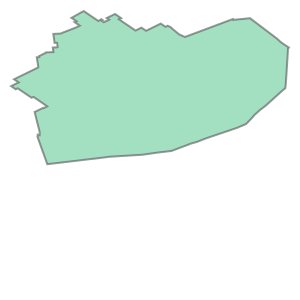

In [185]:
shapefile['geometry'].iloc[0]

In [186]:
shapefile['district'] = shapefile['SLDLST'].apply(lambda x: 'l'+x)
leg_dist_areas = shapefile[['area', 'district']]

In [187]:
shapefile = gpd.read_file("ny_data/senate_shapefiles/tl_2018_36_sldu.shp")
# print (test.crs)
shapefile.head(2)

shapefile= shapefile.to_crs({'proj': 'cea'})
shapefile["area"] = shapefile['geometry'].area/ 10**6
shapefile.head(2)

,STATEFP,SLDUST,GEOID,NAMELSAD,LSAD,LSY,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,36,049,36049,State Senate District 49,LU,2018,G5210,N,9742041586,510983642,+43.5002206,-074.5795437,"POLYGON ((-8367903.823 4418227.422, -8367791.6...",10253.02
1,36,017,36017,State Senate District 17,LU,2018,G5210,N,16347056,0,+40.6241942,-073.9737774,"POLYGON ((-8238967.911 4133558.578, -8238903.1...",16.35


In [188]:
shapefile['district'] = shapefile['SLDUST'].apply(lambda x: 'u'+x)
leg_dist_areas = pd.concat([leg_dist_areas, shapefile[['area', 'district']]])

In [189]:
leg_dist_areas

,area,district
0,55.59,l059
1,14.31,l037
2,77.32,l137
3,315.43,l009
4,16.48,l033
...,...,...
58,165.10,u063
59,223.09,u024
60,2297.71,u041
61,5041.46,u046


In [190]:
sample = pd.merge(sample, leg_dist_areas, how='left', on='district')

In [191]:
sample['pop_density_km'] = sample['Total Pop']/sample['area']
sample

,year,district,dem_net_vote,previous_winner_dem,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,area,pop_density_km
0,2012.0,l002,-16146.0,0.0,125986,61397,64589,115303,4177,107,...,11740,10047,5204,22357,20553,74496,23499,-0.2,1753.99,71.83
1,2012.0,l003,239.0,0.0,129515,63192,66323,108201,11606,172,...,13421,11070,4762,14870,23420,83478,13824,-0.2,287.69,450.19
2,2012.0,l004,11577.0,1.0,128333,63694,64639,102795,7567,472,...,10354,8516,4879,21665,22277,82614,16207,-0.2,457.74,280.36
3,2012.0,l005,-7310.0,0.0,130292,64977,65315,116397,2877,137,...,12619,10676,5650,18883,24649,83642,14932,-0.2,100.81,1292.46
4,2012.0,l006,17148.0,1.0,130598,65399,65199,66302,24827,842,...,13638,8692,2722,7314,24889,84901,11359,-0.2,56.89,2295.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2018.0,u053,13428.0,NaN,285981,137846,148135,221349,40799,1921,...,30787,21617,9038,23234,42179,183689,43614,7.3,2555.28,111.92
505,2018.0,u054,-25954.0,0.0,293440,144683,148757,269550,9029,809,...,34644,24533,10559,28317,45737,178626,53362,7.3,7279.89,40.31
506,2018.0,u058,-18673.0,0.0,289885,143670,146215,257519,10623,646,...,29373,21529,8235,23473,41524,184105,49300,7.3,6998.30,41.42
507,2018.0,u060,-12744.0,0.0,293136,140555,152581,246681,19162,2330,...,34973,25680,10509,33103,43418,183418,50301,7.3,1069.76,274.02


In [192]:
sample[sample['district'] == 'u027']

,year,district,dem_net_vote,previous_winner_dem,Total Pop,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,...,"$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,area,pop_density_km
231,2014.0,u027,38300.0,1.0,323173,159207,163966,238275,16435,1155,...,25411,26985,13829,109877,18357,250921,41976,-2.4,16.36,19748.78


In [193]:
sample = sample.drop(['Total Pop', 'area'], axis=1)

let's count the number of incumbent losses

In [194]:
flips = sample[((sample['dem_net_vote'] < 0) & (sample['previous_winner_dem'] == True)) | ((sample['dem_net_vote'] > 0) & (sample['previous_winner_dem'] == False))]

flips

,year,district,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
1,2012.0,l003,239.0,0.0,63192,66323,108201,11606,172,3762,...,10018,13421,11070,4762,14870,23420,83478,13824,-0.2,450.19
62,2012.0,l093,4785.0,0.0,64177,68858,105177,6476,146,8120,...,7789,8596,7623,4026,31057,25829,81964,17991,-0.2,270.46
86,2012.0,l127,6279.0,0.0,64847,69190,124767,3209,755,3130,...,12744,16645,12536,5523,14665,24102,83739,18442,-0.2,180.44
123,2012.0,u041,2096.0,0.0,152924,156330,247872,28330,599,11366,...,26135,30876,24217,11633,40488,52735,197845,42989,-0.2,134.59
134,2014.0,l003,-524.0,1.0,62893,65279,105805,12074,179,4407,...,10012,12502,11016,4953,15020,22207,82489,15034,-2.4,445.52
211,2014.0,l113,1781.0,0.0,66284,68340,128463,2098,78,1507,...,13792,15234,10984,5203,14452,20844,86317,20039,-2.4,82.98
223,2014.0,l143,-7653.0,1.0,62490,67690,117065,7855,339,1518,...,15879,16464,11178,4435,8779,19031,81536,23125,-2.4,745.11
229,2014.0,u055,-16250.0,1.0,143190,151773,240410,32753,881,7234,...,27710,31939,22856,10254,35542,49132,184212,45469,-2.4,146.84
249,2014.0,u041,-3642.0,1.0,153235,156114,247148,29132,1009,11471,...,26289,29808,23634,10874,42760,50334,198098,45874,-2.4,134.63
253,2014.0,u060,1449.0,0.0,140909,152921,253265,16840,2470,6486,...,31112,34132,23200,10218,26026,44428,187791,45687,-2.4,274.67


In [195]:
flips['district'].value_counts()

l003    2
u041    2
l116    1
u040    1
u039    1
u022    1
u007    1
u006    1
u005    1
u003    1
l146    1
l142    1
l121    1
l099    1
l093    1
l021    1
l009    1
u009    1
l145    1
u008    1
u060    1
u055    1
l143    1
l113    1
l127    1
u042    1
Name: district, dtype: int64

In [196]:
sample = sample.dropna()
sample = sample.reset_index(drop=True)

data = sample.drop(labels='dem_net_vote', axis=1)
target = sample['dem_net_vote']

In [197]:
sample

,year,district,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
0,2012.0,l002,-16146.0,0.0,61397,64589,115303,4177,107,2216,...,10044,11740,10047,5204,22357,20553,74496,23499,-0.2,71.83
1,2012.0,l003,239.0,0.0,63192,66323,108201,11606,172,3762,...,10018,13421,11070,4762,14870,23420,83478,13824,-0.2,450.19
2,2012.0,l004,11577.0,1.0,63694,64639,102795,7567,472,10490,...,8766,10354,8516,4879,21665,22277,82614,16207,-0.2,280.36
3,2012.0,l005,-7310.0,0.0,64977,65315,116397,2877,137,5381,...,9629,12619,10676,5650,18883,24649,83642,14932,-0.2,1292.46
4,2012.0,l006,17148.0,1.0,65399,65199,66302,24827,842,4857,...,12379,13638,8692,2722,7314,24889,84901,11359,-0.2,2295.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2018.0,u051,-28491.0,0.0,140476,144125,267767,4978,481,3142,...,29615,32171,22762,8693,21913,39614,176997,54781,7.3,24.61
446,2018.0,u054,-25954.0,0.0,144683,148757,269550,9029,809,4911,...,30821,34644,24533,10559,28317,45737,178626,53362,7.3,40.31
447,2018.0,u058,-18673.0,0.0,143670,146215,257519,10623,646,11311,...,27206,29373,21529,8235,23473,41524,184105,49300,7.3,41.42
448,2018.0,u060,-12744.0,0.0,140555,152581,246681,19162,2330,7929,...,29493,34973,25680,10509,33103,43418,183418,50301,7.3,274.02


In [78]:
sample[sample['previous_winner_dem'].isna()]

,year,district,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km


In [79]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 44 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   year                                                          414 non-null    float64
 1   district                                                      414 non-null    object 
 2   dem_net_vote                                                  414 non-null    float64
 3   previous_winner_dem                                           414 non-null    float64
 4   Male                                                          414 non-null    int64  
 5   Female                                                        414 non-null    int64  
 6   White alone                                                   414 non-null    int64  
 7   Black or African American alone                               414 non-n

In [80]:
sample.describe()

,year,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
count,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,...,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00,414.00
mean,2015.05,7827.62,0.60,90177.49,95944.71,126068.07,24832.15,633.09,14247.38,61.01,...,14817.53,16747.09,13040.65,5924.19,25299.14,29461.41,118181.47,27588.75,1.45,5789.88
std,2.26,24998.71,0.49,40743.03,43446.16,73504.14,33644.86,528.80,20230.98,72.08,...,7145.60,7977.80,6403.08,3148.68,20099.85,14312.14,53853.31,13735.32,3.69,8688.24
min,2012.00,-74184.00,0.00,51800.00,60945.00,8019.00,1211.00,57.00,590.00,0.00,...,5489.00,6403.00,2677.00,749.00,1379.00,7261.00,66255.00,7980.00,-2.40,10.39
25%,2014.00,-9514.50,0.00,62381.50,66121.25,84037.75,4934.50,285.50,3423.25,11.25,...,9360.00,10659.25,8672.50,3821.00,11039.75,20099.75,80610.50,18328.75,-0.20,221.80
50%,2016.00,7771.00,1.00,65365.50,68374.50,109598.00,11503.50,472.00,7918.00,40.00,...,11919.00,13343.50,10390.50,4879.50,20616.00,22435.50,84407.50,21927.00,0.60,922.67
75%,2018.00,21032.25,1.00,143129.50,150571.50,166885.25,31702.25,820.00,16581.00,82.75,...,21145.50,23933.00,19070.50,8055.25,32040.25,44240.50,182427.00,39554.75,7.30,9941.35
max,2018.00,111047.00,1.00,165659.00,184540.00,282278.00,208441.00,4315.00,177469.00,476.00,...,32062.00,36058.00,27970.00,16926.00,137494.00,63969.00,250921.00,63495.00,7.30,40044.02


In [81]:
sample.columns

Index(['year', 'district', 'dem_net_vote', 'previous_winner_dem', 'Male',
       'Female', 'White alone', 'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races:',
       'Two races including Some other race',
       'Two races excluding Some other race, and three or more races',
       'U.S. citizen, born in the United States',
       'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
       'Speak only English', 'Speak Spanish', 'Speak other languages',
       'Never married', 'Now married, except separated', 'Divorced',
       'Separated', 'Widowed', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'No income', '$1 to $9,999 or loss',
       '$10,000 to $14,999', '$15,000 to $24,

In [82]:
sample[['18 to 64 years', '65 years and over']]

,18 to 64 years,65 years and over
0,74496,23499
1,83478,13824
2,82614,16207
3,83642,14932
4,84901,11359
...,...,...
409,176997,54781
410,178626,53362
411,184105,49300
412,183418,50301


In [83]:
(sample['18 to 64 years'] + sample['65 years and over']).quantile([0.25,0.5,0.75])

0.25     99476.50
0.50    105464.00
0.75    230938.25
dtype: float64

In [84]:
target.quantile([0, 0.25,0.5,0.75, 1])


0.00    -74184.00
0.25     -9514.50
0.50      7771.00
0.75     21032.25
1.00    111047.00
Name: dem_net_vote, dtype: float64

In [85]:
target.abs().quantile([0, 0.25,0.5,0.75, 1])


0.00        95.0
0.25      8830.5
0.50     15005.5
0.75     25313.5
1.00    111047.0
Name: dem_net_vote, dtype: float64

<AxesSubplot:ylabel='Density'>

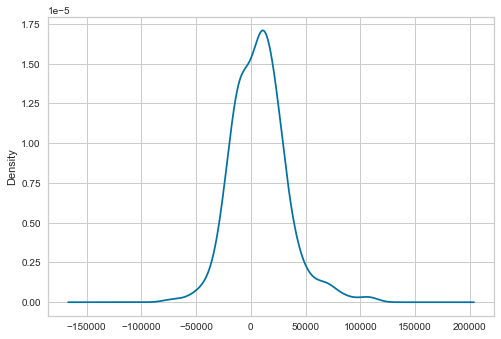

In [86]:
target.plot.kde()

<AxesSubplot:ylabel='Density'>

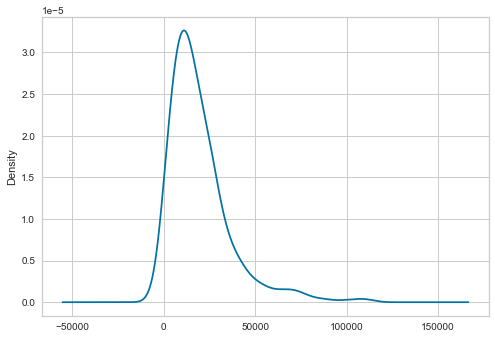

In [87]:
target.abs().plot.kde()

In [88]:
target.quantile(np.linspace(0, 1, num=11)).values

array([-74184. , -20219.1, -11783.8,  -6452.1,   1637.4,   7771. ,
        12188.8,  18257.3,  25025.6,  35620.1, 111047. ])

In [89]:
[str(x) for x in target.quantile(np.linspace(0, 1, num=11)).values]

['-74184.0',
 '-20219.1',
 '-11783.799999999997',
 '-6452.099999999997',
 '1637.4000000000003',
 '7771.0',
 '12188.800000000003',
 '18257.299999999985',
 '25025.600000000002',
 '35620.1',
 '111047.0']

In [90]:
target

0     -16146.0
1        239.0
2      11577.0
3      -7310.0
4      17148.0
        ...   
409   -28491.0
410   -25954.0
411   -18673.0
412   -12744.0
413    -9309.0
Name: dem_net_vote, Length: 414, dtype: float64

In [91]:
flips.describe()

,year,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,2016.00,995.70,0.35,104117.45,108680.20,164802.65,16772.45,695.25,14559.05,62.75,...,16886.85,19286.40,15954.90,7403.35,34621.40,34807.45,132262.00,33958.05,3.67,1077.14
std,2.51,6181.20,0.49,46314.06,47483.07,62240.26,14560.19,444.53,22206.56,58.30,...,7150.54,7884.47,6223.84,3046.59,22233.43,15606.94,57891.18,15841.32,4.19,2028.76
min,2012.00,-16250.00,0.00,61667.00,65279.00,93653.00,2606.00,146.00,1156.00,0.00,...,7789.00,8596.00,7623.00,3621.00,9013.00,18056.00,79124.00,13824.00,-2.40,23.71
25%,2014.00,-1038.75,0.00,63134.50,66596.25,108247.50,5375.25,403.25,3252.25,30.75,...,10016.50,12623.50,10995.50,4801.00,14818.75,20321.50,81423.00,21615.25,-0.20,172.04
50%,2018.00,1539.50,0.00,65376.50,69024.00,123869.00,11840.00,580.00,7677.00,51.50,...,13327.50,15924.00,11831.00,5642.00,29844.00,24965.50,83608.50,25141.50,7.30,424.11
75%,2018.00,3550.50,1.00,153579.50,157288.25,225819.50,27327.25,998.50,11392.25,71.25,...,23937.00,26750.00,22763.75,10621.50,45715.75,50787.75,193793.50,47225.50,7.30,762.99
max,2018.00,12202.00,1.00,159822.00,165783.00,252070.00,51036.00,1832.00,90711.00,250.00,...,27710.00,31939.00,24476.00,11633.00,79148.00,54653.00,201231.00,58993.00,7.30,9011.45


In [92]:
pd.concat([sample, flips]).drop_duplicates(keep=False).describe()

,year,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
count,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,...,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00,394.00
mean,2015.00,8174.41,0.62,89469.88,95298.24,124101.85,25241.27,629.93,14231.56,60.92,...,14712.49,16618.20,12892.72,5849.11,24825.93,29190.04,117466.72,27265.43,1.34,6029.10
std,2.24,25542.04,0.49,40377.95,43196.67,73554.73,34290.83,533.01,20156.27,72.77,...,7138.43,7970.82,6384.28,3138.95,19900.20,14211.17,53620.35,13563.12,3.63,8828.39
min,2012.00,-74184.00,0.00,51800.00,60945.00,8019.00,1211.00,57.00,590.00,0.00,...,5489.00,6403.00,2677.00,749.00,1379.00,7261.00,66255.00,7980.00,-2.40,10.39
25%,2012.50,-10137.75,0.00,62299.50,66057.50,82893.00,4905.25,284.25,3455.50,11.00,...,9321.25,10643.75,8542.25,3763.75,10986.25,20099.75,80610.50,18214.75,-0.20,223.45
50%,2015.00,9081.00,1.00,65365.50,68333.00,108857.50,11451.00,466.50,7918.00,37.50,...,11806.50,13211.50,10260.50,4841.00,20205.00,22401.50,84419.00,21789.00,0.20,982.66
75%,2017.50,21574.00,1.00,142220.75,149332.25,144729.75,31896.25,813.50,16674.50,84.75,...,20852.25,23346.00,18991.00,7597.75,31377.50,42837.25,181997.25,36476.75,5.62,10830.37
max,2018.00,111047.00,1.00,165659.00,184540.00,282278.00,208441.00,4315.00,177469.00,476.00,...,32062.00,36058.00,27970.00,16926.00,137494.00,63969.00,250921.00,63495.00,7.30,40044.02


In [93]:
target1 = []

for value in target:
    if value < -3550:
        target1.append(-1)
    elif value > 3550:
        target1.append(1)
    else:
        target1.append(0)

In [94]:
# target1 = ['{:.0f}'.format(x) for x in target1]

In [95]:
pd.Series(target1).value_counts()

 1    231
-1    142
 0     41
dtype: int64

In [96]:
# ce.target_encoder.TargetEncoder().fit(X_train, y_train)

target_encoder = Pipeline(steps=[
    ('freq_enc', ce.target_encoder.TargetEncoder()),
#     ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
    
])

preprocessor = ColumnTransformer(
    transformers=[
#         ('num', num_transformer, num_cols),
#         ('ohe', ohe_transformer, cols_to_ohe),
        ('target', target_encoder, 0)
    ])
pipe = Pipeline([
    ('preprocessor', preprocessor)
#                         ('scaler', scaler),
#                         ('classifier', estimator)
])

x_trans = pipe.fit_transform(data, target1)



In [97]:
data['district'] = x_trans

In [98]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

for i in np.linspace(10, 100, num=10):
    print('Percentile thresh: ' + str(i) + '\n')
    boruta = BorutaPy(
        estimator = RandomForestClassifier(), 
        n_estimators = 'auto', 
        perc = i
    ).fit(np.array(data), pd.Series(target1))
    
    green_area = data.columns[boruta.support_].to_list()
    blue_area = data.columns[boruta.support_weak_].to_list()
    print('features to keep:', green_area)
    print('features to consider removing:', blue_area)
    
    features_to_drop = []

    for each in data.columns:
        if each in data.columns[boruta.support_].to_list() or each in data.columns[boruta.support_weak_].to_list():
            pass
        else:
            features_to_drop.append(each)
#             print(each)
    print('features to remove:', features_to_drop, '\n')


Percentile thresh: 10.0

features to keep: ['previous_winner_dem', 'Male', 'Female', 'White alone', 'Black or African American alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone', 'Some other race alone', 'Two or more races:', 'Two races including Some other race', 'Two races excluding Some other race, and three or more races', 'U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'Speak only English', 'Speak Spanish', 'Speak other languages', 'Never married', 'Now married, except separated', 'Divorced', 'Separated', 'Widowed', 'Less than high school graduate', 'High school graduate (includes equivalency)', "Some college or associate's degree", "Bachelor's degree", 'Graduate or professional degree', 'No income', '$1 to $9,999 or loss', '$10,000 to $14,999', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $64,999', '$65,000 to $74,999', '$75,000 o

features to keep: ['previous_winner_dem', 'Female', 'White alone', 'Black or African American alone', 'Asian alone', 'Some other race alone', 'Two or more races:', 'Two races including Some other race', 'Two races excluding Some other race, and three or more races', 'U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'Speak only English', 'Speak Spanish', 'Speak other languages', 'Never married', 'Now married, except separated', 'Separated', 'Widowed', 'Less than high school graduate', 'High school graduate (includes equivalency)', "Some college or associate's degree", "Bachelor's degree", 'Graduate or professional degree', 'No income', '$1 to $9,999 or loss', '$10,000 to $14,999', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $64,999', '$65,000 to $74,999', '$75,000 or more', '5 to 17 years', '18 to 64 years', '65 years and over', 'pop_density_km']
features to consider removing: ['Male', 'American Indian 

In [99]:
data = data[['previous_winner_dem', 'Female', 'White alone', 'Black or African American alone', 'Asian alone', 'Some other race alone', 'Two or more races:', 'Two races including Some other race', 'Two races excluding Some other race, and three or more races', 'U.S. citizen, born in the United States', 'U.S. citizen, born in Puerto Rico or U.S. Island Areas', 'Speak only English', 'Speak Spanish', 'Speak other languages', 'Never married', 'Now married, except separated', 'Separated', 'Widowed', 'Less than high school graduate', 'High school graduate (includes equivalency)', "Some college or associate's degree", "Bachelor's degree", 'Graduate or professional degree', 'No income', '$1 to $9,999 or loss', '$10,000 to $14,999', '$15,000 to $24,999', '$25,000 to $34,999', '$35,000 to $49,999', '$50,000 to $64,999', '$65,000 to $74,999', '$75,000 or more', '5 to 17 years', '18 to 64 years', '65 years and over', 'pop_density_km']]

As the default 100 percentile threshold preserves plenty of data in this case I think we'll go with that.

 1    231
-1    142
 0     41
dtype: int64


/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


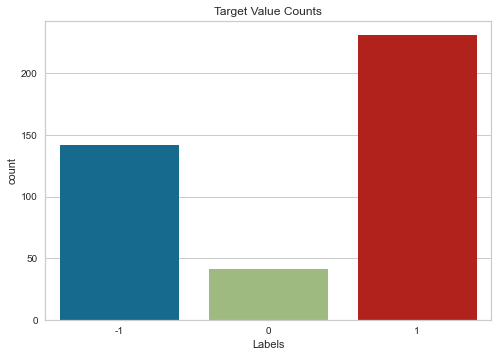

In [100]:
print(pd.Series(target1).value_counts())
sns.countplot(target1)
plt.xlabel('Labels')
plt.title('Target Value Counts')
plt.show()

Class imbalance

In [101]:
#Minority Resampling - SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(target1)))
sm = SMOTE()
X , y = sm.fit_resample(data, target1)
print('Resampled dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({1: 231, -1: 142, 0: 41})
Resampled dataset shape Counter({-1: 231, 0: 231, 1: 231})


In [102]:
# model runner


class ModelRunner():
    
    def __init__(self, pipe, X, y):
        self.X = X
        self.y = y
        self.pipe = pipe
        if type(self.pipe[-1]) == LinearRegression:
            self.model_type = 'linear'
        else:
            self.model_type = 'non_linear'
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, pd.Series(self.y), random_state = 42)
        
        self.pipe.fit(self.X_train, self.y_train)
        
        train_preds = self.pipe.predict(self.X_train)
        test_preds = self.pipe.predict(self.X_test)
        
        if self.model_type == 'linear':
        
            print('Train Scores')
            print('r2 score: ' + str(r2_score(self.y_train, train_preds)))
            print('Mean absolute error: ' + str(mean_absolute_error(self.y_train, train_preds)))
            print('Mean squared error: ' + str(mean_squared_error(self.y_train, train_preds)) + '\n')
            
            print('Test Scores')
            print('r2 score: ' + str(r2_score(self.y_test, test_preds)))
            print('Mean absolute error: ' + str(mean_absolute_error(self.y_test, test_preds)))
            print('Mean squared error: ' + str(mean_squared_error(self.y_test, test_preds)))
            
            visualizer = PredictionError(self.pipe)
            visualizer.fit(self.X_train, self.y_train)  
            visualizer.score(self.X_test, self.y_test)  
            visualizer.poof()
            
            visualizer = ResidualsPlot(self.pipe)
            visualizer.fit(self.X_train, self.y_train)  
            visualizer.score(self.X_test, self.y_test)  
            visualizer.poof()
            
        elif self.model_type == 'non_linear':
            train_preds = pipe.predict(self.X_train)
            test_preds = pipe.predict(self.X_test)

            train_out = pipe.predict_proba(self.X_train)
            test_out = pipe.predict_proba(self.X_test)
            

#             ac = make_scorer(accuracy_score)
#             f1 = make_scorer(f1_score, average='macro')
#             ras = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
#             rec = make_scorer(recall_score, average='weighted')
#             cv = cross_validate(self.pipe, self.X, self.y, scoring = {'accuracy': ac, 'recall': rec, 'f1_score':f1, 'roc_auc_score':ras})
#             for key, values in cv.items():
#                 if key.startswith('test_'):
#                     print(key[5:] + ': ' + str(values.mean()))
            print(classification_report(self.y_test, test_preds))
                    
                    
            visualizer = ROCAUC(self.pipe, classes = ['Democratic Win', 'Republican Win', 'Tossup'])

                    # Fitting to the training data first then scoring with the test data

            visualizer.fit(self.X_train, self.y_train)
            visualizer.score(self.X_test, self.y_test)
            visualizer.show()
        
        
        ConfusionMatrixDisplay.from_predictions(self.y_test, test_preds)
#         cm.plot()
#         plt.show()
#         print(confusion_matrix(self.y_test, test_preds))
#         plot_confusion_matrix(self.pipe, self.X_test, self.y_test, values_format=',.5g')



In [103]:
lr = LogisticRegression()

# target_encoder = Pipeline(steps=[
#     ('freq_enc', ce.target_encoder.TargetEncoder()),
#     ('freq_imputer', SimpleImputer(strategy='constant', fill_value=0))
    
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
# #         ('num', num_transformer, num_cols),
# #         ('ohe', ohe_transformer, cols_to_ohe),
#         ('target', target_encoder, ['district'])
#     ])

pipe = Pipeline([
#             ('preprocessor', preprocessor),
                         ('scaler', StandardScaler()),
                    ('lr', lr)])

In [116]:
list(X.columns)

['previous_winner_dem',
 'Female',
 'White alone',
 'Black or African American alone',
 'Asian alone',
 'Some other race alone',
 'Two or more races:',
 'Two races including Some other race',
 'Two races excluding Some other race, and three or more races',
 'U.S. citizen, born in the United States',
 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Speak only English',
 'Speak Spanish',
 'Speak other languages',
 'Never married',
 'Now married, except separated',
 'Separated',
 'Widowed',
 'Less than high school graduate',
 'High school graduate (includes equivalency)',
 "Some college or associate's degree",
 "Bachelor's degree",
 'Graduate or professional degree',
 'No income',
 '$1 to $9,999 or loss',
 '$10,000 to $14,999',
 '$15,000 to $24,999',
 '$25,000 to $34,999',
 '$35,000 to $49,999',
 '$50,000 to $64,999',
 '$65,000 to $74,999',
 '$75,000 or more',
 '5 to 17 years',
 '18 to 64 years',
 '65 years and over',
 'pop_density_km']

In [118]:
sample

,year,district,dem_net_vote,previous_winner_dem,Male,Female,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"$25,000 to $34,999","$35,000 to $49,999","$50,000 to $64,999","$65,000 to $74,999","$75,000 or more",5 to 17 years,18 to 64 years,65 years and over,generic_ballot,pop_density_km
0,2012.0,l002,-16146.0,0.0,61397,64589,115303,4177,107,2216,...,10044,11740,10047,5204,22357,20553,74496,23499,-0.2,71.83
1,2012.0,l003,239.0,0.0,63192,66323,108201,11606,172,3762,...,10018,13421,11070,4762,14870,23420,83478,13824,-0.2,450.19
2,2012.0,l004,11577.0,1.0,63694,64639,102795,7567,472,10490,...,8766,10354,8516,4879,21665,22277,82614,16207,-0.2,280.36
3,2012.0,l005,-7310.0,0.0,64977,65315,116397,2877,137,5381,...,9629,12619,10676,5650,18883,24649,83642,14932,-0.2,1292.46
4,2012.0,l006,17148.0,1.0,65399,65199,66302,24827,842,4857,...,12379,13638,8692,2722,7314,24889,84901,11359,-0.2,2295.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2018.0,u051,-28491.0,0.0,140476,144125,267767,4978,481,3142,...,29615,32171,22762,8693,21913,39614,176997,54781,7.3,24.61
410,2018.0,u054,-25954.0,0.0,144683,148757,269550,9029,809,4911,...,30821,34644,24533,10559,28317,45737,178626,53362,7.3,40.31
411,2018.0,u058,-18673.0,0.0,143670,146215,257519,10623,646,11311,...,27206,29373,21529,8235,23473,41524,184105,49300,7.3,41.42
412,2018.0,u060,-12744.0,0.0,140555,152581,246681,19162,2330,7929,...,29493,34973,25680,10509,33103,43418,183418,50301,7.3,274.02


In [105]:
green_area

['previous_winner_dem',
 'Female',
 'White alone',
 'Black or African American alone',
 'Asian alone',
 'Some other race alone',
 'Two or more races:',
 'U.S. citizen, born in the United States',
 'U.S. citizen, born in Puerto Rico or U.S. Island Areas',
 'Speak only English',
 'Speak Spanish',
 'Speak other languages',
 'Never married',
 'Now married, except separated',
 'Widowed',
 'Less than high school graduate',
 'High school graduate (includes equivalency)',
 "Some college or associate's degree",
 'Graduate or professional degree',
 'No income',
 '$35,000 to $49,999',
 '$50,000 to $64,999',
 '$65,000 to $74,999',
 '$75,000 or more',
 '5 to 17 years',
 '18 to 64 years',
 'pop_density_km']

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86        57
           0       0.69      0.83      0.75        52
           1       0.96      0.82      0.88        65

    accuracy                           0.83       174
   macro avg       0.84      0.83      0.83       174
weighted avg       0.85      0.83      0.84       174



/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


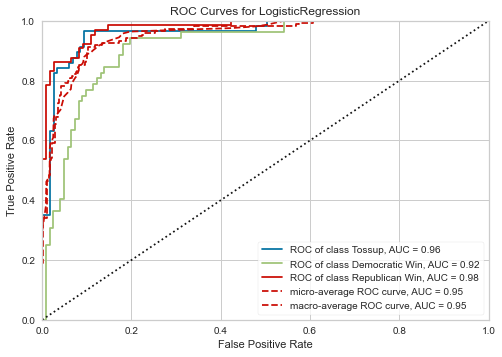

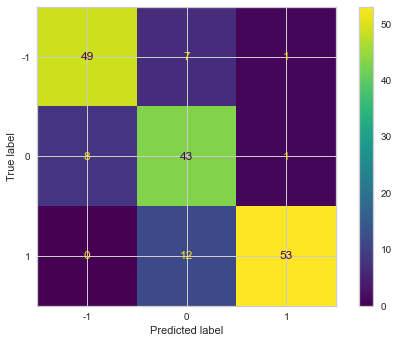

In [106]:
ModelRunner(pipe, X, y)

# ----------------------------------

In [107]:
tree = DecisionTreeClassifier()

pipe = Pipeline([('scaler', StandardScaler()),
                    ('tree', tree)])

              precision    recall  f1-score   support

          -1       0.85      0.93      0.89        57
           0       0.86      0.81      0.83        52
           1       0.92      0.89      0.91        65

    accuracy                           0.88       174
   macro avg       0.88      0.88      0.88       174
weighted avg       0.88      0.88      0.88       174



/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


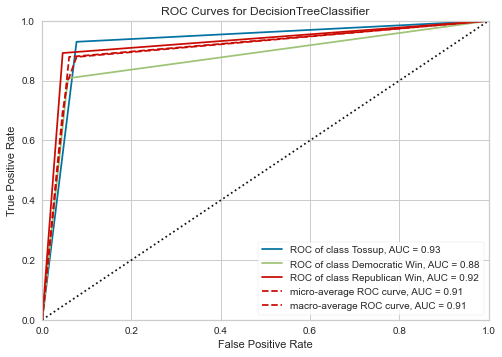

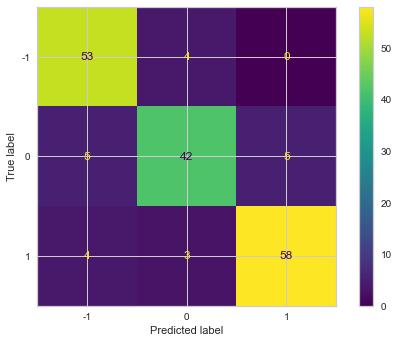

In [108]:
ModelRunner(pipe, X, y)

# --------------------------------

In [109]:
rf = RandomForestClassifier()

pipe = Pipeline([
                         ('scaler', StandardScaler()),
                    ('rf', rf)])

              precision    recall  f1-score   support

          -1       0.95      0.96      0.96        57
           0       0.85      0.98      0.91        52
           1       1.00      0.86      0.93        65

    accuracy                           0.93       174
   macro avg       0.93      0.94      0.93       174
weighted avg       0.94      0.93      0.93       174



/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


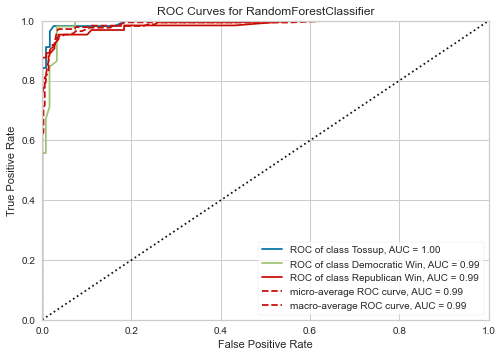

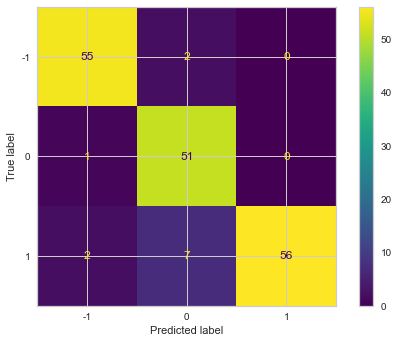

In [110]:
ModelRunner(pipe, X, y)

# --------------------------

In [111]:
svc = SVC(probability=True)

pipe = Pipeline([
                         ('scaler', StandardScaler()),
                    ('svc', svc)])

              precision    recall  f1-score   support

          -1       0.81      0.96      0.88        57
           0       0.65      0.75      0.70        52
           1       1.00      0.71      0.83        65

    accuracy                           0.80       174
   macro avg       0.82      0.81      0.80       174
weighted avg       0.83      0.80      0.81       174



/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


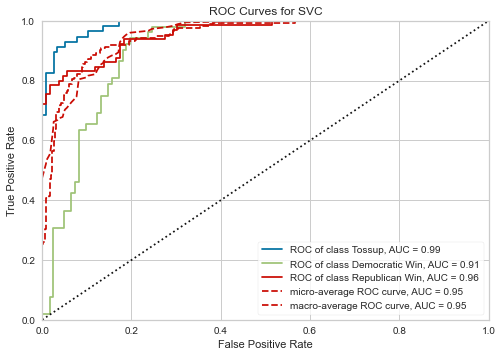

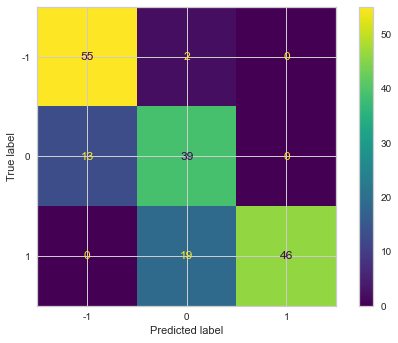

In [112]:
ModelRunner(pipe, X, y)

# --------------------------

In [113]:
ada = AdaBoostClassifier()

pipe = Pipeline([
                         ('scaler', StandardScaler()),
                    ('ada', ada)])

              precision    recall  f1-score   support

          -1       0.91      0.72      0.80        57
           0       0.67      0.92      0.77        52
           1       0.95      0.83      0.89        65

    accuracy                           0.82       174
   macro avg       0.84      0.82      0.82       174
weighted avg       0.85      0.82      0.83       174



/Users/stone/.conda/envs/capstone4/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


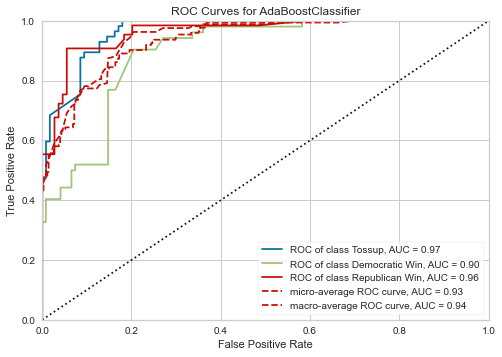

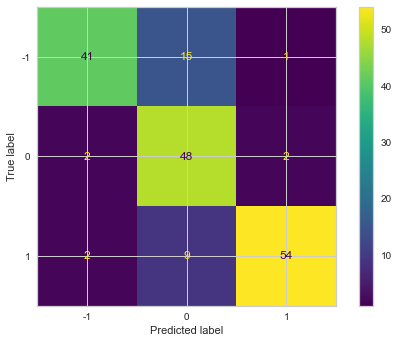

In [114]:
ModelRunner(pipe, X, y)